In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import os
os.chdir(r"C:\Users\dbda\Desktop\MACHINE LEARNING\Datasets")

In [24]:
df = pd.read_csv("gdp-per-capita-ppp-constant-2011.csv",
                 index_col=0)


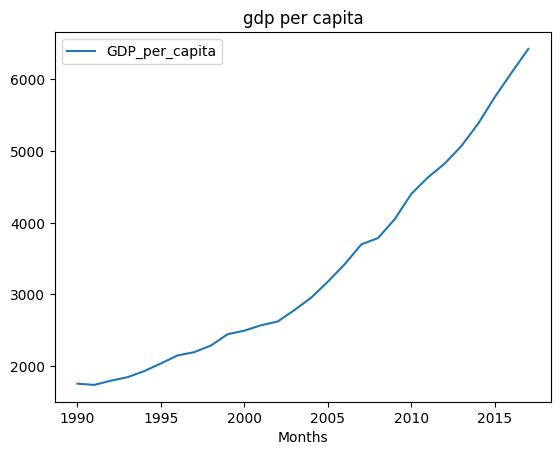

In [25]:
df.plot()
plt.title("gdp per capita")
plt.xlabel("Months")
plt.show()

In [26]:
y = df['GDP_per_capita']

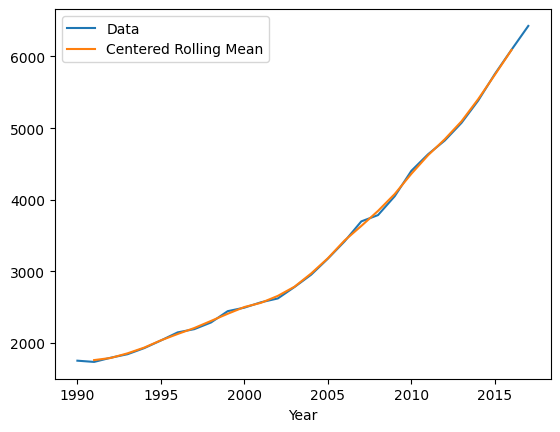

In [27]:
#### Centered Rolling Mean
span=3
fcast = y.rolling(span,center=True).mean()
y.plot(label='Data')
fcast.plot(label='Centered Rolling Mean')
plt.legend(loc='best')
plt.show()

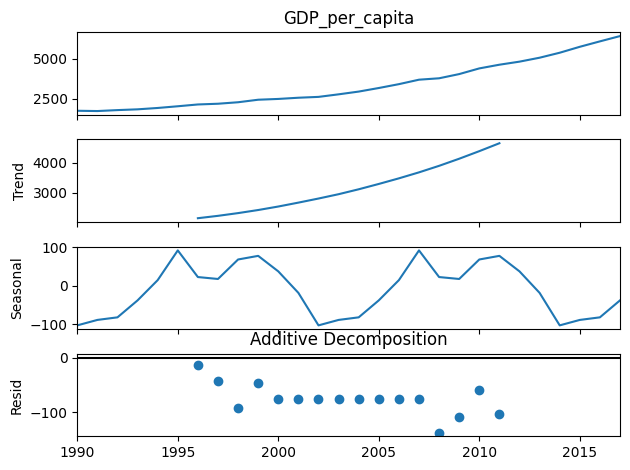

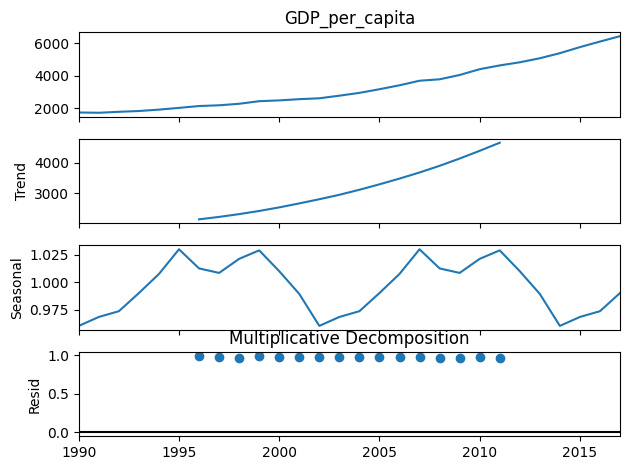

In [28]:
############ Decomposition ################
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv("gdp-per-capita-ppp-constant-2011.csv",
                 index_col=0)
series = df['GDP_per_capita']
result = seasonal_decompose(series,
         model='additive',period=12)
result.plot()
plt.title("Additive Decomposition")
plt.show()

series = df['GDP_per_capita']
result = seasonal_decompose(series, 
         model='multiplicative',period=12)
result.plot()
plt.title("Multiplicative Decomposition")
plt.show()

In [40]:
##############################################
df = pd.read_csv("gdp-per-capita-ppp-constant-2011.csv",
                 index_col=0)
#df.index = pd.to_datetime( df.index ).to_period("M")

y = df['GDP_per_capita']
y_train = df['GDP_per_capita'].iloc[:-4]
y_test = df['GDP_per_capita'].iloc[-4:]
print(y.shape)
print(y_train.shape, y_test.shape)


(28,)
(24,) (4,)


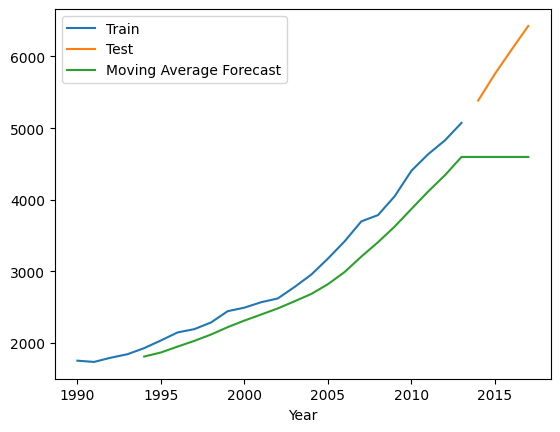

1886514.9862147383


In [37]:
span=5
fcast = y_train.rolling(span).mean()
MA = fcast.iloc[-1]
MA_series = pd.Series(MA.repeat(len(y_test)))
MA_fcast = pd.concat([fcast,MA_series],ignore_index=True)
MA_fcast.index = y.index
y_train.plot(label='Train')
y_test.plot(label='Test')
MA_fcast.plot(label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

print(mean_squared_error(y_test, MA_series))

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exce

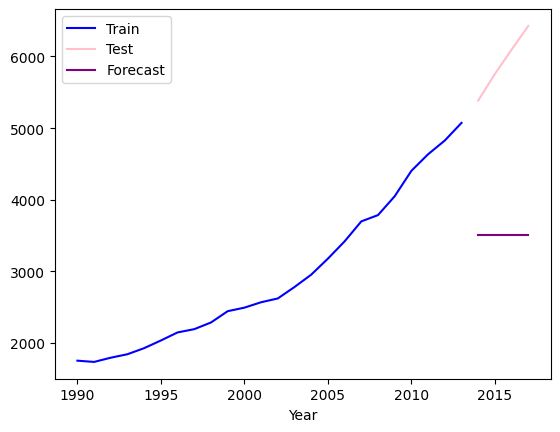

5960549.0610564705


In [43]:
###### SES
from statsmodels.tsa.api import SimpleExpSmoothing
alpha = 0.1
ses = SimpleExpSmoothing(y_train)
fit1 = ses.fit(smoothing_level=alpha)
fcast1 = fit1.forecast(len(y_test))
fcast1.index=y_test.index
# plot
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
plt.legend(loc='best')
plt.show()
print(mean_squared_error(y_test, fcast1))


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exce

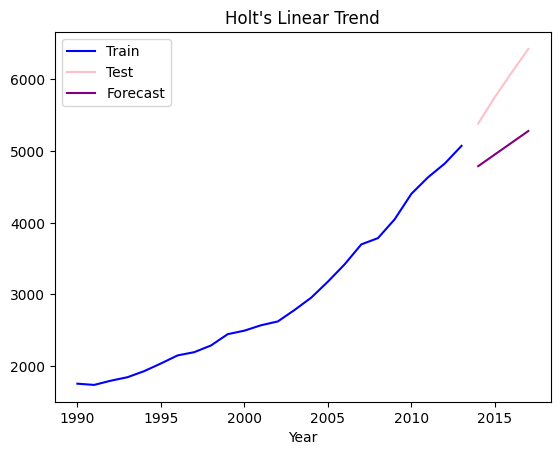

816823.6087248158


In [45]:
###### Holt's Linear
alpha = 0.2
beta = 0.1
### Linear Trend
from statsmodels.tsa.api import Holt
holt = Holt(y_train)
fit1 = holt.fit(smoothing_level=alpha,
            smoothing_trend=beta)
fcast1 = fit1.forecast(len(y_test))
fcast1.index=y_test.index

# plot
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
plt.title("Holt's Linear Trend")
plt.legend(loc='best')
plt.show()

print(mean_squared_error(y_test, fcast1))

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exce

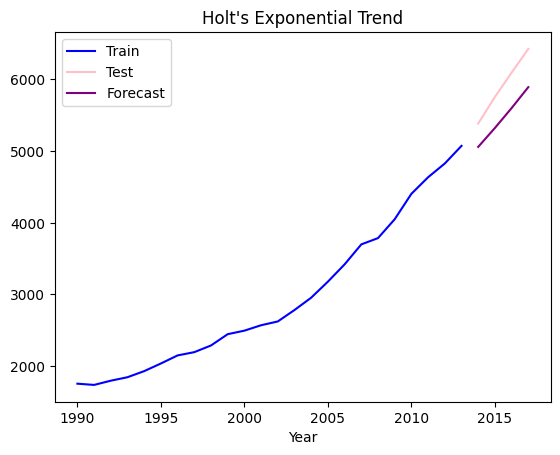

205647.20935814054


In [47]:
# Holt's Exponential Method
alpha = 0.2
beta = 0.1
from statsmodels.tsa.api import Holt
holt = Holt(y_train, exponential=True)
fit1 = holt.fit(smoothing_level=alpha,
            smoothing_trend=beta)
fcast1 = fit1.forecast(len(y_test))
fcast1.index=y_test.index

# plot
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')

plt.title("Holt's Exponential Trend")
plt.legend(loc='best')
plt.show()

print(mean_squared_error(y_test, fcast1))

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exce

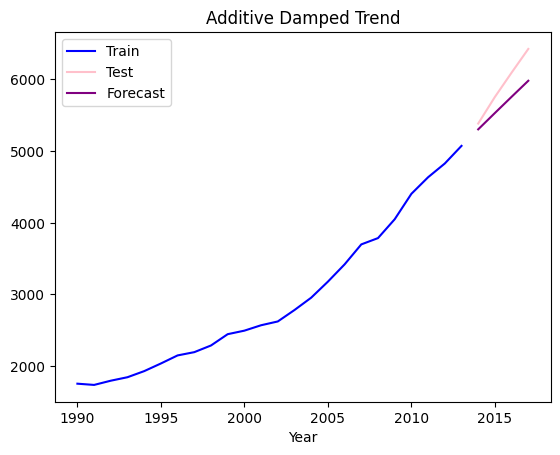

{'smoothing_level': 0.995, 'smoothing_trend': 0.49749999999999994, 'smoothing_seasonal': nan, 'damping_trend': 0.99, 'initial_level': 1754.857, 'initial_trend': -17.241999999999962, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
92005.16852551323


In [48]:
##### Additive Damped
alpha = 0.2
beta = 0.1
phi = 0.3
from statsmodels.tsa.api import Holt
holt = Holt(y_train, damped_trend=True)
fit1 = holt.fit(smoothing_level=alpha,
            smoothing_trend=beta, damping_trend=phi)
### no params - autotuning
fit1 = holt.fit()
fcast1 = fit1.forecast(len(y_test))
fcast1.index=y_test.index

# plot
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
plt.title("Additive Damped Trend")
plt.legend(loc='best')
plt.show()

print(fit1.params)

print(mean_squared_error(y_test, fcast1))

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exce

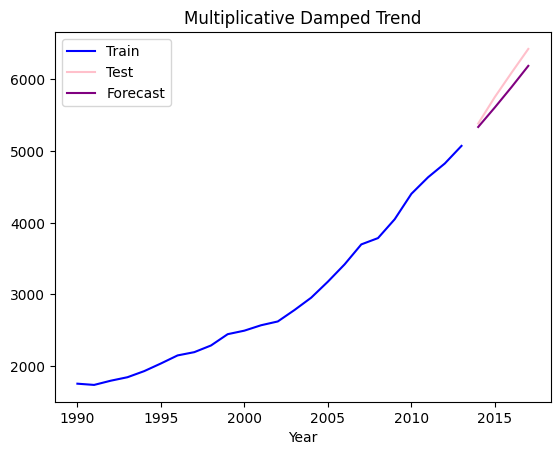

{'smoothing_level': 0.9999688163084877, 'smoothing_trend': 0.3510585152883083, 'smoothing_seasonal': nan, 'damping_trend': 0.9876366039401888, 'initial_level': 1754.857, 'initial_trend': 1.0026922623147843, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
29875.819546577728


In [50]:
##### Multiplicative Damped
alpha = 0.2
beta = 0.1
phi = 0.3
from statsmodels.tsa.api import Holt
holt = Holt(y_train, damped_trend=True, exponential=True)
fit1 = holt.fit(smoothing_level=alpha,
            smoothing_trend=beta, damping_trend=phi)
### no params - autotuning
fit1 = holt.fit()
fcast1 = fit1.forecast(len(y_test))
fcast1.index=y_test.index

# plot
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
plt.title("Multiplicative Damped Trend")
plt.legend(loc='best')
plt.show()

print(fit1.params)

print(mean_squared_error(y_test, fcast1))

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


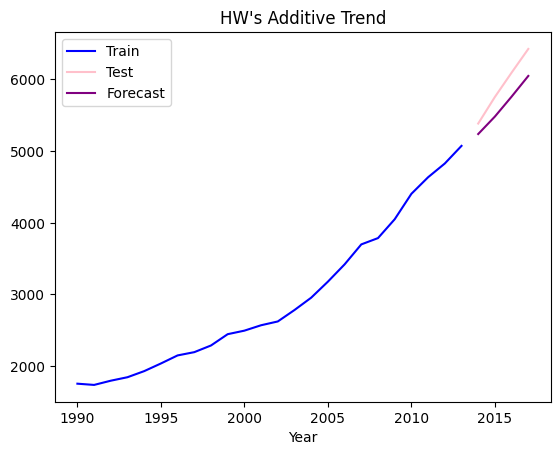

{'smoothing_level': 0.6816566957099628, 'smoothing_trend': 0.6809512180110614, 'smoothing_seasonal': 2.0430196283085643e-05, 'damping_trend': nan, 'initial_level': 1816.1370958369605, 'initial_trend': 15.641152658061822, 'initial_seasons': array([ -87.88694656, -105.81378961,  -89.80107025,  -63.00012685,
        -20.0924121 ,   42.44090932,    2.26175893,    5.58677775,
         68.87833501,   91.81542772,   30.91532591,   -0.25459256]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
87672.84246268283


In [51]:
# Holt-Winters' Method

########### Additive #####################
from statsmodels.tsa.api import ExponentialSmoothing
alpha = 0.8
beta = 0.02
gamma = 0.1
hw_add = ExponentialSmoothing(y_train, seasonal_periods=12, 
                            trend='add', seasonal='add')

fit1 = hw_add.fit(smoothing_level=alpha, 
                    smoothing_trend=beta,
                    smoothing_seasonal=gamma)

### no params - autotuning
fit1 = hw_add.fit()
fcast1 = fit1.forecast(len(y_test))
fcast1.index=y_test.index

# plot
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
plt.title("HW's Additive Trend")
plt.legend(loc='best')
plt.show()

print(fit1.params)

print(mean_squared_error(y_test, fcast1))


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


{'smoothing_level': 0.7248152810777863, 'smoothing_trend': 0.7248107439274405, 'smoothing_seasonal': 1.3296080192953686e-06, 'damping_trend': nan, 'initial_level': 1955.501347757314, 'initial_trend': 10.721823804116287, 'initial_seasons': array([0.88523221, 0.88260753, 0.8887611 , 0.89952394, 0.91340594,
       0.93242187, 0.91181005, 0.91462133, 0.93458431, 0.93608618,
       0.92090746, 0.91510463]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


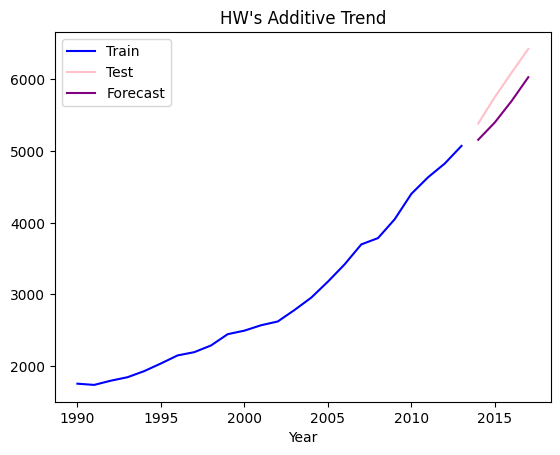

122335.56613149738


In [52]:
###### Multiplicative Method
alpha = 0.8
beta = 0.02
gamma = 0.1
hw_add = ExponentialSmoothing(y_train, seasonal_periods=12, 
                            trend='add', seasonal='mul')

fit1 = hw_add.fit(smoothing_level=alpha, 
                    smoothing_trend=beta,
                    smoothing_seasonal=gamma)

### no params - autotuning
fit1 = hw_add.fit()
print(fit1.params)
fcast1 = fit1.forecast(len(y_test))
fcast1.index=y_test.index

# plot
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
plt.title("HW's Additive Trend")
plt.legend(loc='best')
plt.show()

print(mean_squared_error(y_test, fcast1))